In [1]:
from api_keys import gkey
import numpy as np
import pandas as pd
import requests
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#states list for url
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [3]:
#testing 123
# response=requests.get(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.REPRB.CA.A')
# cali = response.json()

In [4]:
# help_me = dict(cali['series'][0]['data'][0:11])
# help_me.values()

In [3]:
states_df = pd.DataFrame({})

In [4]:
#api call. This is for overall renewable energy production per billion Btu
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.REPRB.{state}.A')
    response=requests.get(url)
    all_states = response.json()
    states_data = dict(all_states['series'][0]['data'][0:11])
    states_df[state]= states_data.values()
    

In [5]:
states_df=states_df.transpose()

In [6]:
states_df = states_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [7]:
states_df = states_df[states_df.columns[::-1]]

In [8]:
states_df.to_csv("renewable_production_bill_btu.csv")

In [8]:
renewable_energy_df = pd.DataFrame(states_df.mean(axis = 1))
avg_df_bot = renewable_energy_df.sort_values(0)
bottom_five_states = avg_df_bot.head(5)
print(bottom_five_states)

               0
DC    572.909091
DE   3582.727273
RI   4196.818182
AK  19500.727273
HI  21342.090909


In [9]:
avg_df_top = renewable_energy_df.sort_values(0, ascending = False)
top_five_states = avg_df_top.head(5)
print(top_five_states)

                0
WA  925651.363636
CA  801967.181818
IA  686434.272727
TX  545308.363636
OR  461926.454545


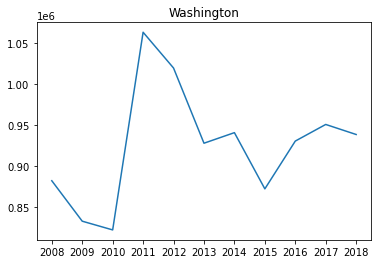

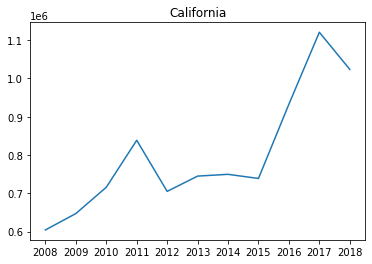

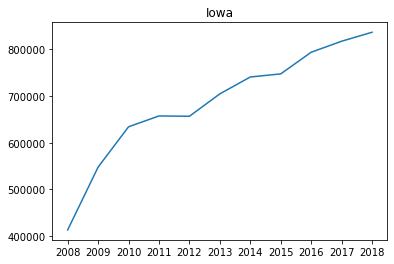

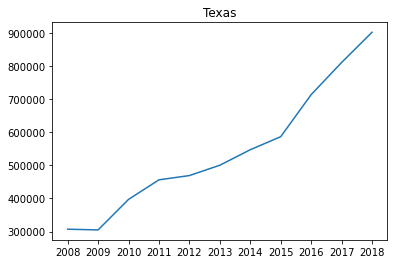

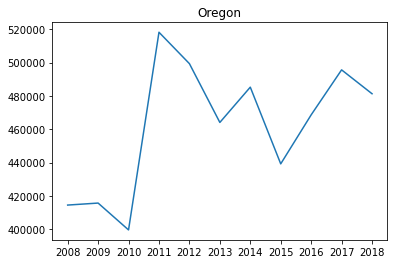

In [12]:
#ploting renewable energy (all sources) over time
plt.plot(states_df.iloc[-4])
plt.title("Washington")
plt.show()
plt.plot(states_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(states_df.iloc[15])
plt.title("Iowa")
plt.show()
plt.plot(states_df.iloc[-8])
plt.title("Texas")
plt.show()
plt.plot(states_df.iloc[-14])
plt.title("Oregon")
plt.show()

In [17]:
#I put in 2017 for the change date because that is what we have for emissions data but can update easily
for row in states_df.iterrows():
    change_production = states_df["2017"]-states_df["2008"]
change_production = change_production.sort_values(0, ascending=False)
change_production.head(5)

CA    516070
TX    504482
IA    404128
OK    192704
NE    188627
dtype: int32

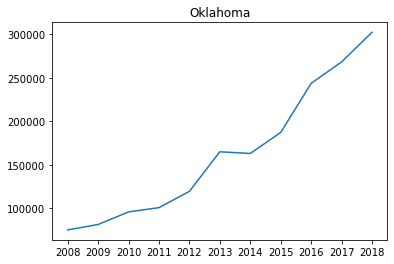

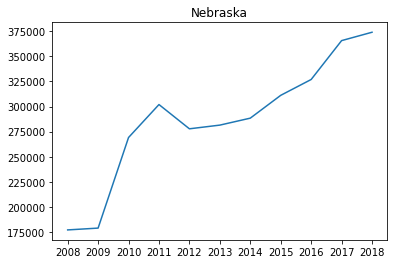

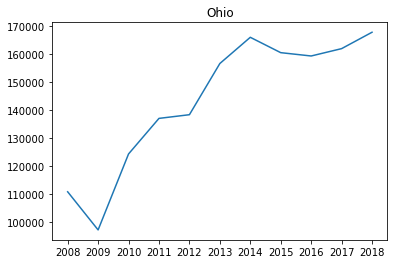

In [20]:
plt.plot(states_df.iloc[36])
plt.title("Oklahoma")
plt.show()
plt.plot(states_df.iloc[27])
plt.title("Nebraska")
plt.show()
plt.plot(states_df.iloc[35])
plt.title("Ohio")
plt.show()

In [19]:
states_df.reset_index()


,index,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,234001,264530,242243,255849,242204,313665,270743,258941,230731,254958,276734
1,AK,12913,15685,16965,16078,17796,18629,19790,23807,25120,23608,24117
2,AZ,96752,80898,85935,113360,98806,98958,120149,129266,139231,148625,154992
3,AR,124882,125695,126235,124987,114237,121310,119813,117808,115408,115289,125039
4,CA,604499,647227,715878,838547,705086,744983,749645,738814,932768,1120569,1023623
5,CO,80070,80116,82190,104147,102686,116979,125648,123965,147499,150632,154200
6,CT,26358,29529,30357,30760,26910,30046,32677,33236,34222,33502,38245
7,DC,65,49,114,290,285,305,344,824,1107,1316,1603
8,DE,2952,3577,3838,4172,3581,3795,4224,3517,3102,3268,3384
9,FL,195232,213645,230259,227710,223034,234142,231370,223817,223467,238863,249373


In [21]:
#data for state solar energy consumption over time
consumption_df=pd.DataFrame({})

In [22]:
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.SOTCB.{state}.A')
    response2=requests.get(url)
    all_states_cons = response2.json()
    states_data_cons = dict(all_states_cons['series'][0]['data'][0:11])
    consumption_df[state]= states_data_cons.values()

In [23]:
consumption_df=consumption_df.transpose()

In [27]:
consumption_df = consumption_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [28]:
consumption_df = consumption_df[consumption_df.columns[::-1]]

In [30]:
energy_consumption_df = pd.DataFrame(consumption_df.mean(axis = 1))
avg_df_bot5 = energy_consumption_df.sort_values(0)
bottom_five = avg_df_bot5.head(5)
print(bottom_five)

            0
ND   5.818182
AK   7.727273
SD  11.454545
WY  23.272727
WV  81.818182


In [31]:
avg_top5 = energy_consumption_df.sort_values(0, ascending = False)
top_five = avg_top5.head(5)
print(top_five)

                0
CA  148721.636364
AZ   31816.000000
FL   30541.727273
NV   16617.454545
NC   15441.181818


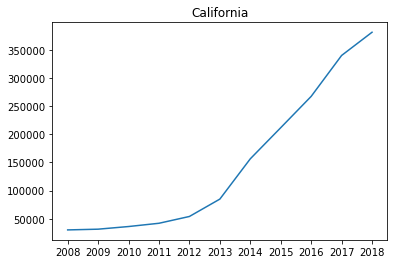

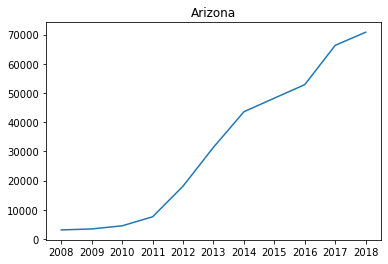

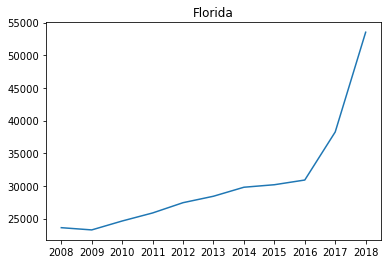

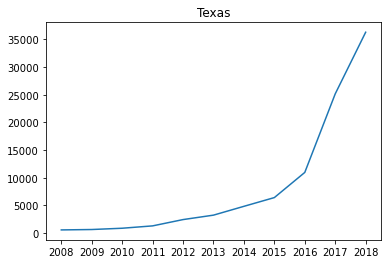

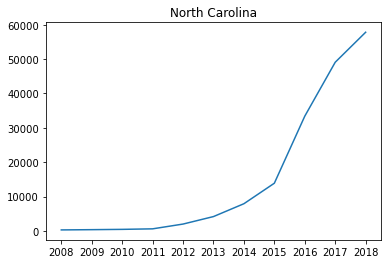

In [33]:
#ploting solar energy comsumption over time top 5
plt.plot(consumption_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(consumption_df.iloc[2])
plt.title("Arizona")
plt.show()
plt.plot(consumption_df.iloc[9])
plt.title("Florida")
plt.show()
plt.plot(consumption_df.iloc[43])
plt.title("Texas")
plt.show()
plt.plot(consumption_df.iloc[33])
plt.title("North Carolina")
plt.show()

In [34]:
consumption_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
AL,64,62,68,71,78,97,100,101,431,1812,3425
AK,2,3,3,3,3,3,3,3,14,20,28
AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326,70800
AR,53,59,80,85,100,108,111,124,372,442,2118
CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408,381733
CO,819,1148,1808,2865,3886,5186,6046,6271,9509,13974,15338
CT,929,1062,1137,1189,1295,1601,2241,2954,4130,5089,6486
DC,20,22,80,203,240,253,292,304,295,481,651
DE,50,85,125,383,607,1001,1189,1230,1133,1354,1492
FL,23615,23273,24638,25868,27441,28428,29805,30189,30909,38265,53528
